In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load dataset

In [2]:
Alg = pd.read_csv("Customers.csv")

# Display first few rows and check for null values and duplicates

In [3]:
print(Alg.head())
print(Alg.isnull().sum())
print("Duplicated:", Alg.duplicated().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicated: 0


# Extract relevant features for clustering

In [4]:
X = Alg.iloc[:, [3, 4]].values

# Calculate WCSS for different number of clusters

In [5]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    wcss.append(km.inertia_)

C:\Users\gunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

# ignore the error

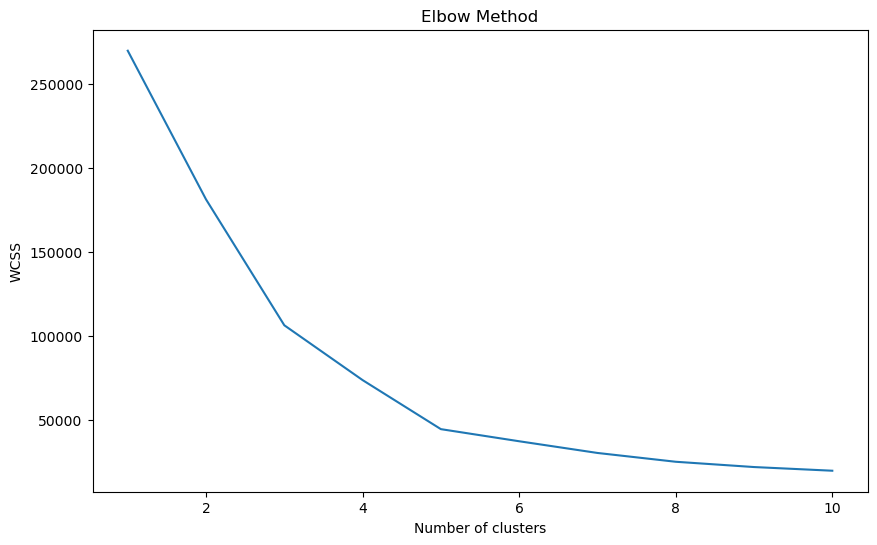

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans clustering with the chosen number of clusters

In [7]:
km = KMeans(n_clusters=5, random_state=42)
y_means = km.fit_predict(X)


C:\Users\gunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gunji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Plot the clusters

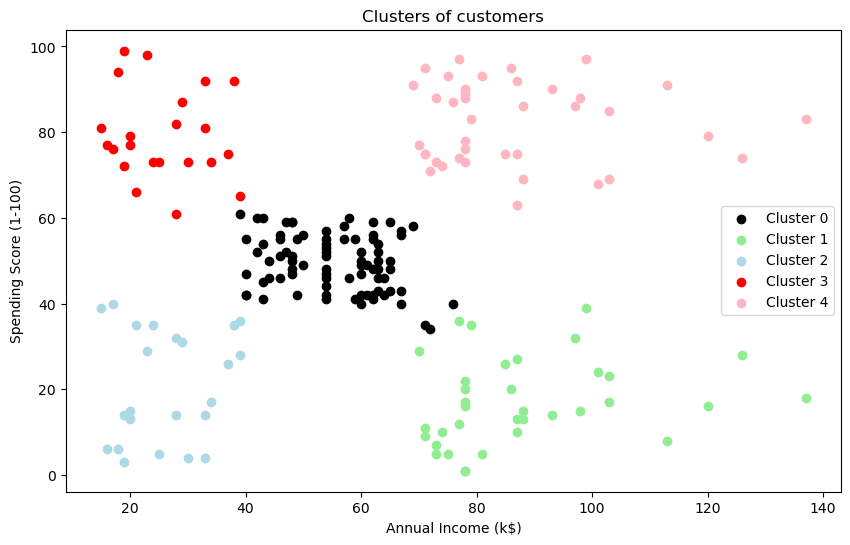

In [8]:
plt.figure(figsize=(10, 6))
colors = ['black', 'lightgreen', 'lightblue', 'red', 'lightpink']
for i in range(5):
    plt.scatter(X[y_means == i, 0], X[y_means == i, 1], color=colors[i], label=f'Cluster {i}')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Add cluster labels to the original dataframe


In [9]:
Alg["Target"] = y_means
Clustered_Alg = Alg
print(Clustered_Alg.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  Target
0           1    Male   19                  15                      39       2
1           2    Male   21                  15                      81       3
2           3  Female   20                  16                       6       2
3           4  Female   23                  16                      77       3
4           5  Female   31                  17                      40       2


# Prepare data for classification

In [10]:
X = Clustered_Alg.iloc[:, 1:5]
Y = Clustered_Alg.iloc[:, -1]

# Encode categorical variables

In [11]:
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# Split the data into training and test sets

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train Gradient Boosting Classifier

In [14]:
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
gbdt.fit(X_train, Y_train)


GradientBoostingClassifier(n_estimators=50, random_state=2)

# Make predictions and evaluate the model

In [15]:
Y_pred = gbdt.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.975


# Display the predictions

In [16]:
prediction = pd.DataFrame({'Original Value': Y_test, 'Predicted Value': Y_pred})
print(prediction)

     Original Value  Predicted Value
95                0                0
15                3                3
30                2                2
158               1                1
128               1                1
115               0                0
69                0                0
170               1                1
174               1                1
45                3                0
66                0                0
182               1                1
165               4                4
78                0                0
186               1                1
177               4                4
56                0                0
152               1                1
82                0                0
68                0                0
124               1                1
16                2                2
148               1                1
93                0                0
65                0                0
60                0                0
8